In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ann import ann
import ann_utils
import train_utils
import gd

In [2]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Meta information about the data.
n_train = len(y_train.flatten())
n_test = len(y_test.flatten())
input_dim = len(X_train[0].flatten())
output_dim = 10

# Split train data to train and validation sets.
ind = [i for i in range(n_train)]
np.random.shuffle(ind)
m = int(n_train * 0.1)
X_valid = X_train[ind[1: m]]
y_valid = y_train[ind[1: m]]
X_train = X_train[ind[m:]]
y_train = y_train[ind[m:]]

2023-03-19 15:04:25.429959: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 15:04:25.536506: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 15:04:25.536525: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-19 15:04:26.162681: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
# Set Hyperparameters
epochs = 10
ann.num_layers = 5
ann.hidden_size = 128
ann.batch_size = 100

In [4]:
## Functions
# ann.activation = ann_utils.tanh
# ann.d_activation = ann_utils.d_tanh
ann.activation = ann_utils.relu
ann.d_activation = ann_utils.d_relu
ann.weight_init = ann_utils.xavier_init

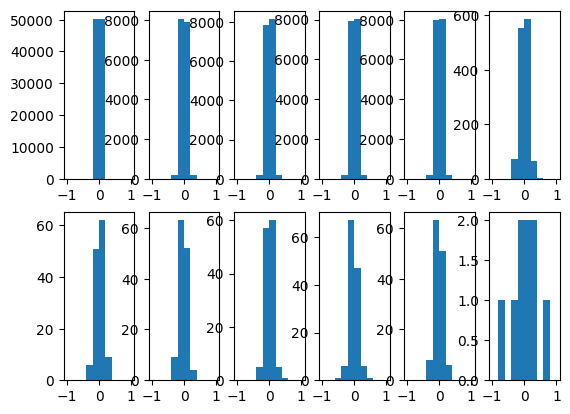

In [5]:
# Define an ANN.
nn = ann(28 * 28, 10)
ann_utils.view_weights_distribution(nn, ann.num_layers, -1, 1)

In [6]:
# Train the ANN.

gd.batch_gd(nn, X_train, y_train, epochs)

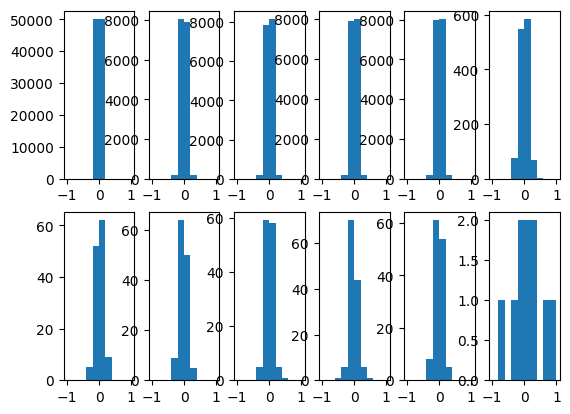

In [7]:
ann_utils.view_weights_distribution(nn, ann.num_layers, -1, 1)

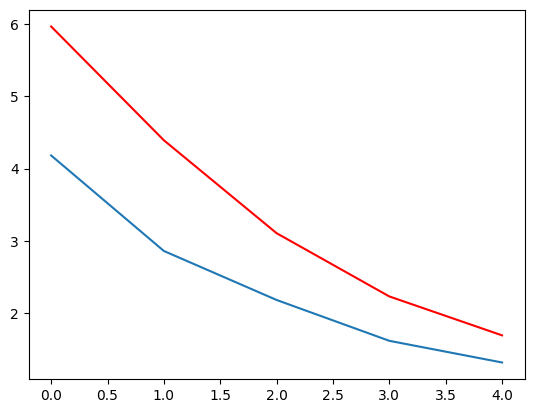

In [8]:
i, j = 1, 500
u = nn.predict(X_train[i])
ua = nn.a
uh = nn.h

v = nn.predict(X_train[j])
va = nn.a
vh = nn.h

diffa = []
diffh = []

for i in range(len(va)):
    diffh.append(np.linalg.norm(vh[i] - uh[i]))
    diffa.append(np.linalg.norm(va[i] - ua[i]))

plt.plot(diffh)
plt.plot(diffa, 'r')

In [11]:
# print(ua[0])
# print(va[0])
# print(uh[0])
# print(vh[0])

In [10]:
train_utils.get_classification_accuracy(nn, X_valid, y_valid)

0.3887